## Paper: Hash Embeddings for Efficient Word Representations

http://papers.nips.cc/paper/7078-hash-embeddings-for-efficient-word-representations.pdf

### The problem for current word embeddings

- Huge vocabulary in order of hundreds of thousands, which adds millions or even billions of parameters to the model
- Problem becomes severe if n-grams are allowed as tokens

#### Solutions till now

- Ignore infrequent words (Zipf's law) - risk of removing too much or too little
- Remove non-discriminative tokens after training - feature pruning based on entropy - not possible for online training
- Compress embedding vectors : quantization (replace each vector by an approximation which is constructed as a sum of vectors from a previously determined set of centroids)

### Related Works

- for online learning, use _feature hashing_: using a hash function assign each token to a fixed set of buckets, each of which has its own embedding vector
- problem: collision, tokens end up having same vectors
    - learn optimal hash function? not easy
- Argerich et. al proposed embedding based on hashing and word co-occurrence
    - two hash functions, one for feature and another for sign
- Bai et al. (2009) have experimented with hashing and treating words that co-occur frequently as the same feature in order to reduce dimensionality

- Another common approach is to reduce the tokens to individual characters (Zhang et al, etc) or syllables. Increases the computation cost of the models itself.

### Hash Embedding setup

- Use $k$ different hash functions to choose _k component vectors_ for token $w$ from a pool of $B$ shared component vectors (buckets)
- Combine the chosen vectors into a weighted sum $$\hat{e}_w = \sum p_w H(w)$$
- $p_w$ are called importance parameters
- optional: concatenate the vector of $p_w$ with final hash $\hat{e}_w$


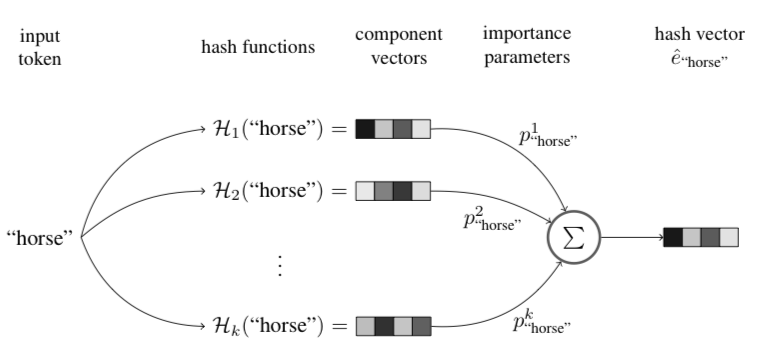

In [1]:
from IPython.display import Image, HTML, display
Image("hash_emb.png")

#### Trainable parameters

- Embedding matrix $E$ of size $B x d$, where $B$ = number of buckets (component vectors) of length $d$
- importance parameters $P$ of size $K x k$, where $k$ = number of different hash functions, and $K$ = number of words

#### Pros

- total number of trainable params is $B.d + K.k$. $B$ can be chosen small without degrading performance
- not necessary to create any dictionary beforehand
- Use of multiple hash functions reduces collision to a large magnitude
- Importance parameters prune unimportant words by setting their values close to 0

#### Caveats

- If using one hash function $k = 1$, all importance parameters are fixed to 1 ($p_w = 1$) for all tokens, and hash embeddings are equivalent to using hashing trick
- Number of component vectors if set to number of words, and if the hash function is an identity function, then hash embeddings = standard embeddings

## Experiments

- Text classification
    - Simple models: 
        - Shallow network: fastText
        - Deep network: embedding layer followed by 3 dense layers of 1000 units and relu activations, ending in a softmax
    - Adam optimization, LR = 0.001, early stopping with patience 0
- Hash embeddings without a dictionary - choose large enough bucket size (1 million)
- Hash embeddings with a dictionary - choose best bucket size from cross validation (500 to 150K)
- Ensemble of hash embeddings

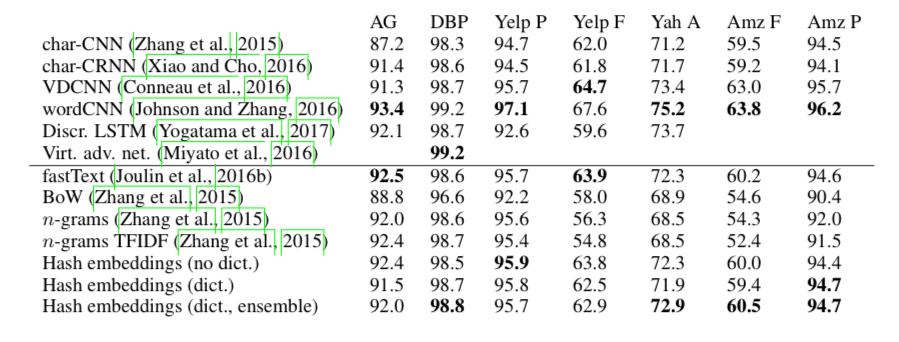

In [2]:
Image("hash_emb_1.png")

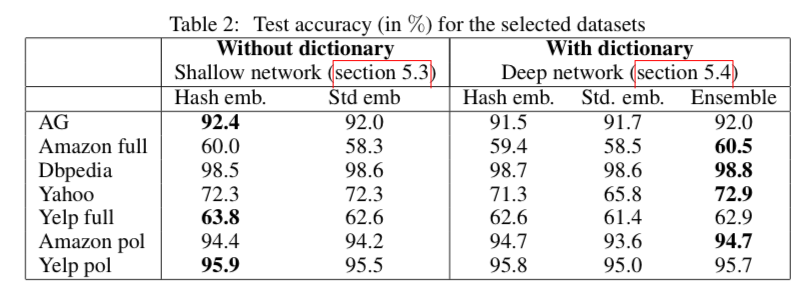

In [3]:
Image("hash_emb_2.png")

## Thoughts?

- More studies should be done to see how the hashed embeddings correlate with learned embeddings
- Would be interesting to see pre-trained hash embeddings like word2vec, their placement / correlation and performance.